# **Visual Information Processing Lab**

# LeNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/My Drive/2021/MTech/Files/')
print(os.getcwd())

/content/drive/My Drive/2021/MTech/Files


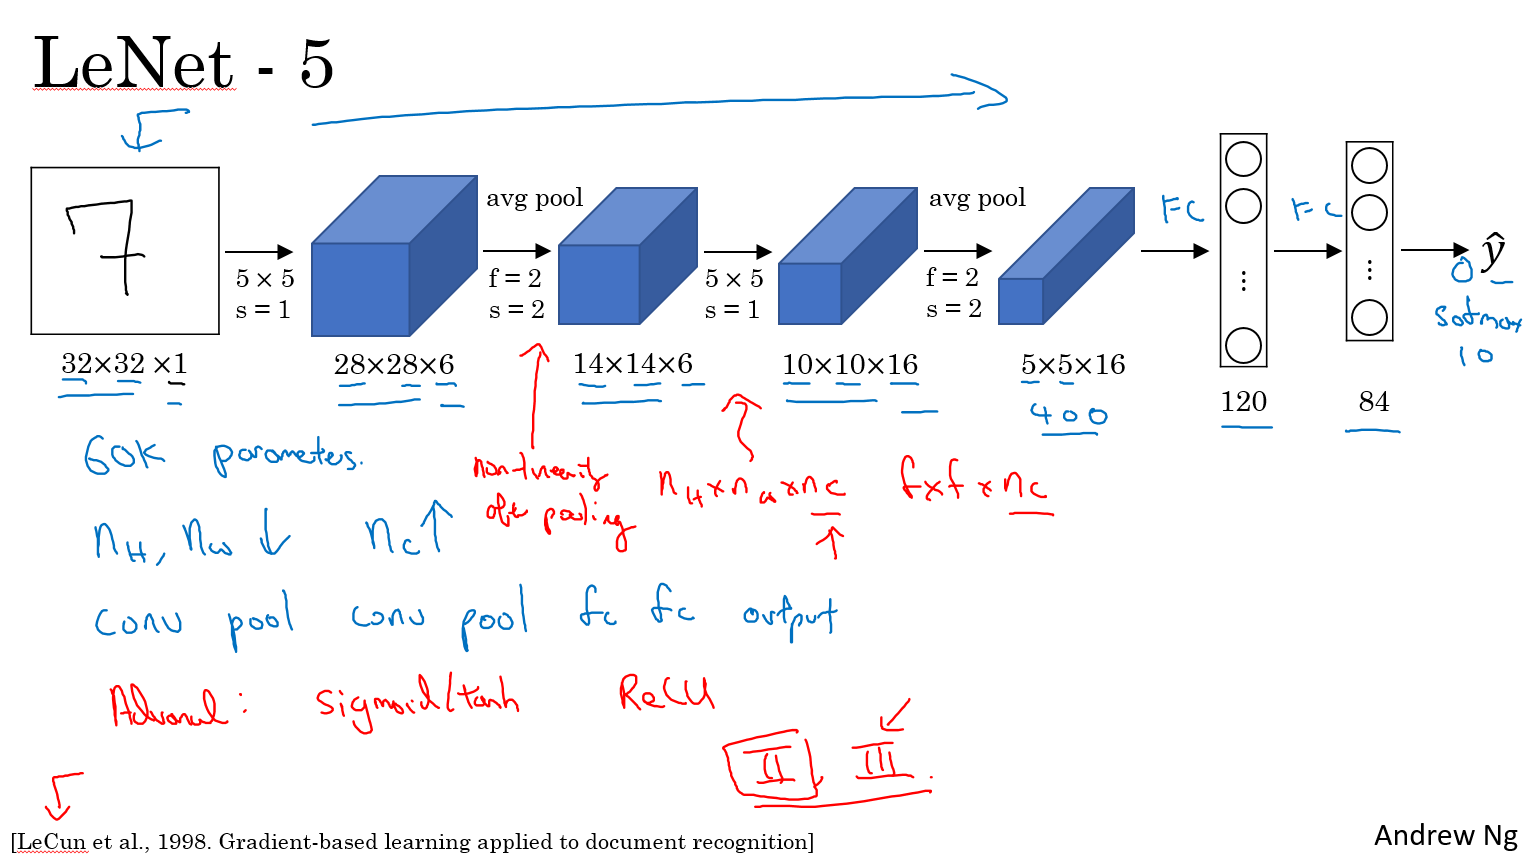

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/2021/MTech/Files/lenet.png"))

### Datasets and Pre Processing

In [ ]:
import keras
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


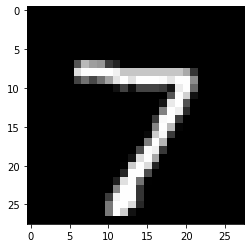

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='gray')

In [ ]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [ ]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [ ]:
import numpy as np
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444
2.8215446 2.8215446
-0.42407447 -0.42407447


In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
print(xtrain.shape)
xtest =  xtest.reshape(xtest.shape[0],28,28,1)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
ytrain =  to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### LeNet Model

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

### Visualization of randomly initialized filters

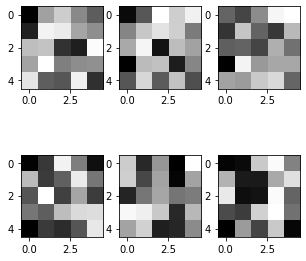

In [ ]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.1452201   0.05232906  0.10620545  0.0233352  -0.03037485]
 [-0.10406537  0.15262555  0.14272423  0.05758788  0.02916598]
 [ 0.08732094  0.0942878  -0.08381747 -0.10654856  0.1636331 ]
 [ 0.05433133  0.16783862  0.01035395  0.0279527   0.03108606]
 [ 0.13544847 -0.03026515 -0.03967091  0.1489989  -0.08584896]]

[[-0.16946714 -0.06246056  0.1746657   0.10564037  0.1542712 ]
 [ 0.00227885  0.09535144  0.13493271  0.10640527 -0.01145792]
 [ 0.05389701  0.1599193  -0.1570139   0.0814219   0.04343756]
 [-0.18454817  0.07832427  0.08638869 -0.14247127  0.00465508]
 [-0.06380526  0.11826925 -0.05604222  0.08807956 -0.07286572]]

[[-0.03398021 -0.07485726  0.01880427  0.15843533  0.17036022]
 [-0.09640046  0.09288754 -0.03534183 -0.09282438  0.07766245]
 [-0.04077357 -0.03569305 -0.07496215  0.06419592 -0.01709107]
 [-0.16695772  0.15414758  0.03565258  0.05418803  0.05396271]
 [ 0.04729636  0.03804514  0.09919979  0.12019698 -0.03278548]]

[[-0.17067385 -0.09693014  0.15808846 -0.00142351

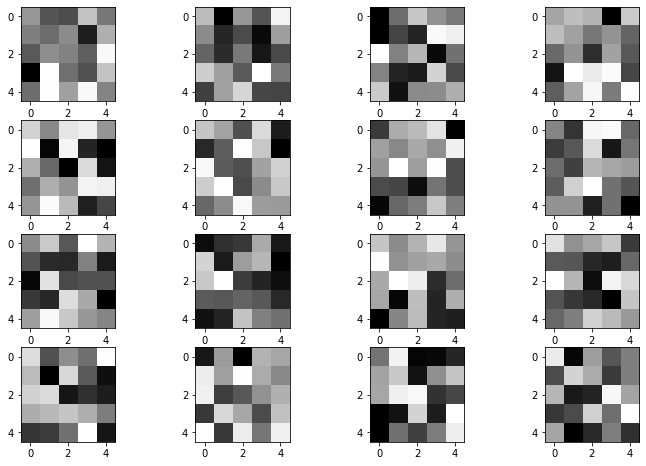

In [ ]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.01564188 -0.03507508 -0.0414715   0.05108696 -0.00801496]
 [-0.00206026 -0.0170005   0.00720859 -0.07866437  0.03504084]
 [-0.03112141  0.00984496  0.00034489 -0.02775809  0.09377499]
 [-0.10230357  0.09849533 -0.01430924 -0.03814953  0.05143958]
 [-0.01644815  0.09739625  0.0235628   0.09347442  0.00106551]]

[[ 0.0561737  -0.06707799  0.03261498 -0.01146656  0.09399106]
 [ 0.02490352 -0.04169776 -0.01746985 -0.0604173   0.03684083]
 [-0.00074831 -0.03863238  0.01368577 -0.05129278 -0.01795582]
 [ 0.06852296  0.03786395 -0.00820397  0.10151543  0.0128019 ]
 [-0.0247204   0.03955957  0.07412356 -0.02014946 -0.02153391]]

[[-0.0934593  -0.01497846  0.04888983  0.01147795 -0.00657415]
 [-0.09391057 -0.04448044 -0.0670498   0.08549957  0.07787608]
 [ 0.08990531 -0.00092748  0.0373237  -0.08713686 -0.01175509]
 [ 0.00129234 -0.06672301 -0.07522194  0.0585365  -0.04103791]
 [ 0.05136266 -0.08118249  0.00538494  0.00705155  0.03124143]]

[[ 0.02594687  0.04485506  0.03632501 -0.10074013

### Compile and Training the model

In [ ]:
os.chdir('/content/drive/My Drive/2021/MTech/Weights/')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,CSVLogger
mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

/content/drive/My Drive/2021/MTech/Weights


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=50, verbose=1)

Epoch 1/50
188/188 [==============================] - ETA: 0s - loss: 1.4605 - accuracy: 0.5825
Epoch 00001: val_loss improved from inf to 0.61251, saving model to CNN_MNIST.h5
188/188 [==============================] - 33s 15ms/step - loss: 1.4605 - accuracy: 0.5825 - val_loss: 0.6125 - val_accuracy: 0.8182
Epoch 2/50
188/188 [==============================] - ETA: 0s - loss: 0.5012 - accuracy: 0.8531
Epoch 00002: val_loss improved from 0.61251 to 0.41293, saving model to CNN_MNIST.h5
188/188 [==============================] - 2s 9ms/step - loss: 0.5012 - accuracy: 0.8531 - val_loss: 0.4129 - val_accuracy: 0.8784
Epoch 3/50
187/188 [============================>.] - ETA: 0s - loss: 0.3789 - accuracy: 0.8886
Epoch 00003: val_loss improved from 0.41293 to 0.32344, saving model to CNN_MNIST.h5
188/188 [==============================] - 2s 9ms/step - loss: 0.3790 - accuracy: 0.8886 - val_loss: 0.3234 - val_accuracy: 0.9099
Epoch 4/50
182/188 [============================>.] - ETA: 0s - lo

### Evaluate

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0839 - accuracy: 0.9728


[0.08388413488864899, 0.9728000164031982]

### Prediction

In [ ]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[3.6614072e-09 1.1508852e-09 2.3592822e-05 1.6971641e-04 1.2715135e-12
  3.3232774e-07 2.8126015e-11 9.9980038e-01 8.0624673e-08 5.8403739e-06]]
7


In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0839 - accuracy: 0.9728
0.08388413488864899
0.9728000164031982


### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

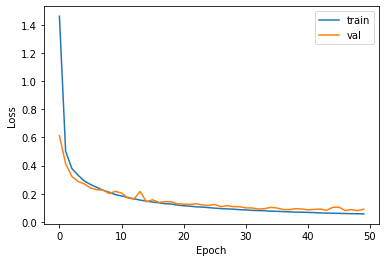

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

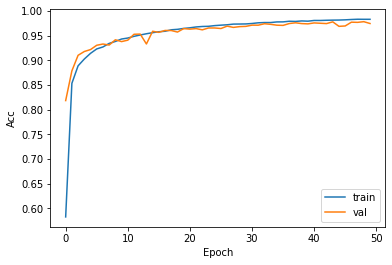

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [ ]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9


In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99       980
     class 1       0.99      0.99      0.99      1135
     class 2       0.98      0.95      0.97      1032
     class 3       0.96      0.98      0.97      1010
     class 4       0.98      0.97      0.98       982
     class 5       0.99      0.96      0.97       892
     class 6       0.99      0.97      0.98       958
     class 7       0.91      0.99      0.95      1028
     class 8       0.98      0.96      0.97       974
     class 9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 976    0    0    0    0    1    0    1    2    0]
 [   0 1125    2    2    0    0    1    2    3    0]
 [   5    2  982    4    1    0    1   33    4    0]
 [   0    1    2  987    0    3    0    9    3    5]
 [   0    0    2    0  956    0    3   10    0   11]
 [   2    1    0   20    0  855    5    5    2    2]
 [   2    4    2    1   11    1  934    0    3    0]
 [   0    3    5    1    0    0    0 1019    0    0]
 [   4    1    6   10    1    1    2   15  931    3]
 [   2    4    0    8    8    2    1   21    0  963]]


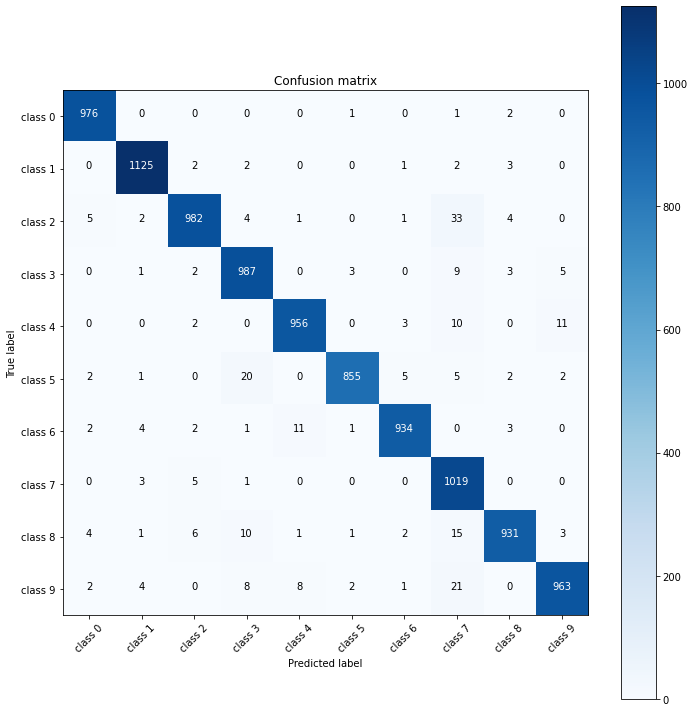

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [ ]:
for layer in model.layers:
  print(layer)

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))

In [ ]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 256)
(1, 120)
(1, 84)
(1, 10)


(1, 24, 24, 6)


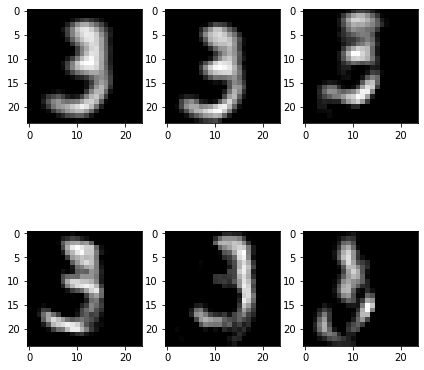

In [ ]:
print(activations[0].shape)
display_activation(activations,3,2,0)

(1, 12, 12, 6)


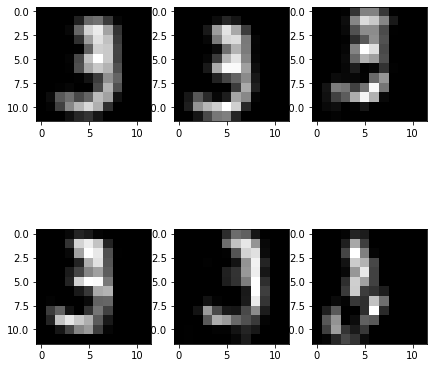

In [ ]:
print(activations[1].shape)
display_activation(activations,3,2,1)

(1, 8, 8, 16)


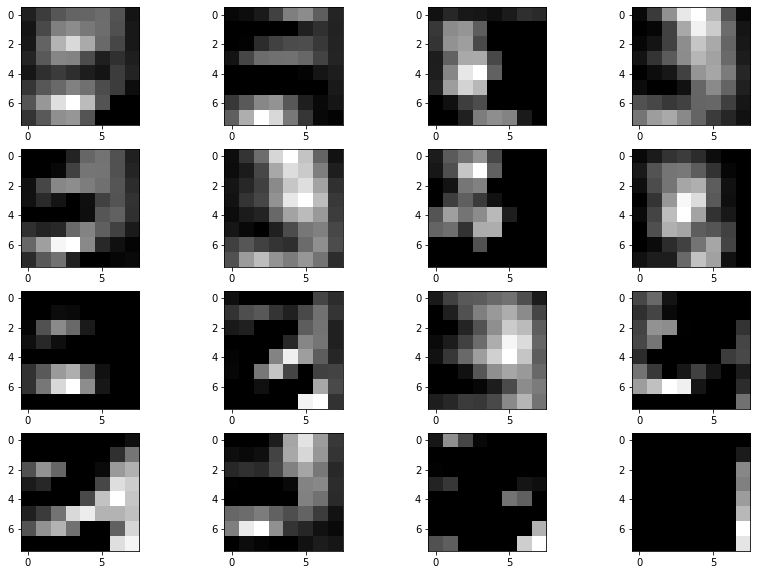

In [ ]:
print(activations[2].shape)
display_activation(activations,4,4,2)

(1, 4, 4, 16)


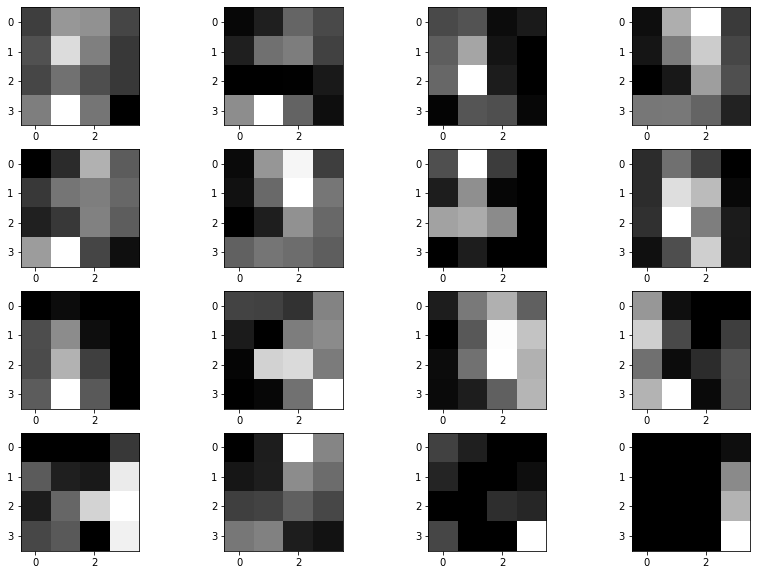

In [ ]:
print(activations[3].shape)
display_activation(activations,4,4,3)

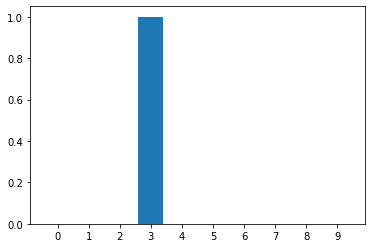

In [ ]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

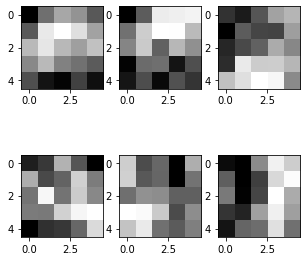

In [ ]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.2   0.16  0.34  0.27  0.08]
 [ 0.09  0.55  0.62  0.52  0.32]
 [ 0.39  0.54  0.39  0.31  0.42]
 [ 0.23  0.39  0.21  0.17  0.09]
 [ 0.05 -0.14 -0.19  0.01 -0.15]]

[[-0.24  0.01  0.38  0.39  0.4 ]
 [ 0.06  0.3   0.43  0.43  0.25]
 [ 0.11  0.29  0.02  0.24  0.14]
 [-0.23  0.04  0.05 -0.18 -0.03]
 [-0.18 -0.04 -0.21 -0.02 -0.1 ]]

[[-0.13 -0.19 -0.06  0.12  0.16]
 [-0.25 -0.04 -0.09 -0.1   0.11]
 [-0.16 -0.08 -0.03  0.14  0.06]
 [-0.15  0.28  0.22  0.22  0.17]
 [ 0.19  0.26  0.33  0.31  0.07]]

[[-0.15 -0.1   0.13 -0.05 -0.21]
 [ 0.12 -0.07 -0.02  0.19  0.03]
 [ 0.01  0.27  0.01  0.18  0.05]
 [ 0.03  0.02  0.19  0.26  0.28]
 [-0.21 -0.12 -0.1  -0.01  0.21]]

[[ 0.17 -0.1  -0.05 -0.26  0.1 ]
 [ 0.17 -0.08 -0.05 -0.26 -0.02]
 [-0.03  0.04  0.03 -0.06 -0.06]
 [ 0.28  0.26  0.16 -0.11  0.03]
 [ 0.15  0.23 -0.03 -0.07  0.  ]]

[[-0.29 -0.32  0.04  0.3   0.21]
 [-0.07 -0.32 -0.16  0.24  0.33]
 [-0.01 -0.31 -0.14  0.34  0.12]
 [-0.18 -0.23  0.09  0.3   0.09]
 [-0.27 -0.06 -0.04  0.26 -0.03]]

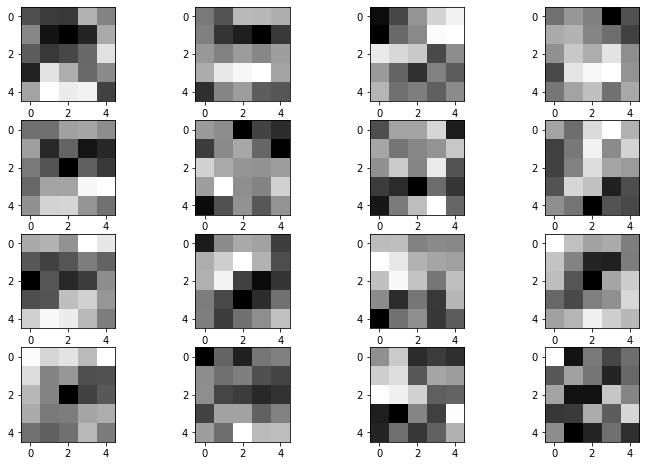

In [ ]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [ ]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[-0.01 -0.03 -0.04  0.11  0.05]
 [ 0.06 -0.08 -0.11 -0.06  0.1 ]
 [ 0.01 -0.04 -0.02  0.02  0.16]
 [-0.07  0.17  0.1   0.02  0.06]
 [ 0.09  0.2   0.18  0.19 -0.03]]

[[-0.01 -0.1   0.13  0.13  0.11]
 [ 0.   -0.17 -0.22 -0.29 -0.16]
 [ 0.06  0.    0.07  0.02  0.07]
 [ 0.11  0.24  0.27  0.3   0.08]
 [-0.18  0.02  0.07 -0.08 -0.09]]

[[-0.19 -0.1   0.02  0.12  0.16]
 [-0.21 -0.04  0.    0.18  0.18]
 [ 0.15  0.12  0.1  -0.09  0.01]
 [ 0.03 -0.05 -0.13 -0.01 -0.06]
 [ 0.07 -0.03 -0.01 -0.06  0.01]]

[[-0.01  0.05  0.01 -0.22 -0.07]
 [ 0.09  0.11  0.02 -0.02 -0.1 ]
 [ 0.04  0.14  0.09  0.19  0.04]
 [-0.08  0.19  0.23  0.24  0.05]
 [-0.    0.08  0.13 -0.01  0.09]]

[[ 0.   -0.    0.09  0.1   0.05]
 [ 0.09 -0.13 -0.02 -0.17 -0.13]
 [ 0.02 -0.05 -0.21 -0.03 -0.1 ]
 [-0.02  0.09  0.09  0.25  0.26]
 [ 0.06  0.18  0.19  0.07  0.  ]]

[[ 0.07  0.06 -0.11 -0.03 -0.06]
 [-0.04  0.05  0.09  0.01 -0.11]
 [ 0.14  0.09  0.07  0.06  0.08]
 [ 0.08  0.2   0.06  0.05  0.14]
 [-0.1  -0.02  0.06 -0.01  0.07]]